In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc


In [85]:
df = pd.read_csv('Churn.csv')

In [86]:
# make all column names lowercase
df.columns = map(str.lower, df.columns)
df.columns

#Rename
df.rename(columns = {'subscription  length':'subscription length',
                    'call  failure': 'call failure',
                    'charge  amount': 'charge amount'}, inplace = True)

In [87]:
print(f"Unique Values: \n{df.nunique()} \n")
df.info()

Unique Values: 
call failure                 37
complains                     2
subscription length          45
charge amount                11
seconds of use             1756
frequency of use            242
frequency of sms            405
distinct called numbers      92
age group                     5
tariff plan                   2
status                        2
age                           5
customer value             2654
fn                         2654
fp                         2195
churn                         2
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call failure             3150 non-null   int64  
 1   complains                3150 non-null   int64  
 2   subscription length      3150 non-null   int64  
 3   charge amount            3150 non-null   int64  
 4   seconds of use       

In [ ]:
df.head(15)

In [ ]:
# drop categorical var that have more than binary variable
df = df.drop(columns=['age group', 'age', 'fn', 'fp'])
df

In [22]:
print(f"Unique Values: \n{df.nunique()} \n")
print(df.info())

Unique Values: 
call failure                 37
complains                     2
subscription length          45
charge amount                11
seconds of use             1756
frequency of use            242
frequency of sms            405
distinct called numbers      92
tariff plan                   2
status                        2
customer value             2654
churn                         2
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call failure             3150 non-null   int64  
 1   complains                3150 non-null   int64  
 2   subscription length      3150 non-null   int64  
 3   charge amount            3150 non-null   int64  
 4   seconds of use           3150 non-null   int64  
 5   frequency of use         3150 non-null   int64  
 6   frequency of sms         3150 non-null   

In [ ]:
#change numerical var to categorical var
cat_var = ['complains', 'tariff plan', 'status']
df[cat_var] = df[cat_var].astype("category")
print(f"Unique Values: \n{df.nunique()} \n")
print(df.info())

In [35]:
#Dummy Variable is a way of incorporating nominal variables into a regression as a binary value
dummy_df = pd.get_dummies(df)

In [36]:
print(f"Unique Values: \n{dummy_df.nunique()} \n")
print(dummy_df.info())

Unique Values: 
call failure                 37
subscription length          45
charge amount                11
seconds of use             1756
frequency of use            242
frequency of sms            405
distinct called numbers      92
customer value             2654
churn                         2
complains_0                   2
complains_1                   2
tariff plan_1                 2
tariff plan_2                 2
status_1                      2
status_2                      2
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call failure             3150 non-null   int64  
 1   subscription length      3150 non-null   int64  
 2   charge amount            3150 non-null   int64  
 3   seconds of use           3150 non-null   int64  
 4   frequency of use         3150 non-null   int64  
 5  

In [38]:
#splitting the data
y = dummy_df.churn.values

# Drop the target feature from remaining features
X = dummy_df.drop('churn', axis = 1)

# Save dataframe column titles to list, we will need them in next step
cols = X.columns

In [39]:
#feature scalling
# Import the necessary sklearn method
from sklearn.preprocessing import MinMaxScaler
# Instantiate a Min-Max scaling object
mm = MinMaxScaler()
# Fit and transform our feature data into a pandas dataframe
X = pd.DataFrame(mm.fit_transform(X))

In [40]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.222222,0.795455,0.0,0.255705,0.278431,0.009579,0.175258,0.091277,1.0,0.0,1.0,0.0,1.0,0.0
1,0.000000,0.818182,0.0,0.018607,0.019608,0.013410,0.041237,0.021261,1.0,0.0,1.0,0.0,0.0,1.0
2,0.277778,0.772727,0.0,0.143534,0.235294,0.687739,0.247423,0.709617,1.0,0.0,1.0,0.0,1.0,0.0
3,0.277778,0.795455,0.0,0.245641,0.258824,0.001916,0.360825,0.110849,1.0,0.0,1.0,0.0,1.0,0.0
4,0.083333,0.795455,0.0,0.140023,0.227451,0.003831,0.340206,0.067338,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0.583333,0.363636,0.2,0.391867,0.576471,0.176245,0.453608,0.333435,1.0,0.0,0.0,1.0,1.0,0.0
3146,0.472222,0.318182,0.1,0.540492,0.694118,0.153257,0.432990,0.120636,1.0,0.0,1.0,0.0,1.0,0.0
3147,0.361111,0.340909,0.4,0.184728,0.200000,0.072797,0.216495,0.129461,1.0,0.0,1.0,0.0,1.0,0.0
3148,0.194444,0.181818,0.2,0.274722,0.180392,0.425287,0.123711,0.497691,1.0,0.0,1.0,0.0,1.0,0.0


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 33)

In [42]:
from sklearn.linear_model import LogisticRegression
# Instantiate a logistic regression model without an intercept, arbitrarily large C value will offset the lack of intercept
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver 
= 'liblinear')
# Fit the model to our X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [43]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [52]:
# Find residual differences between train data and predicted train data
residuals = np.abs(y_train, y_hat_train)

In [57]:
# Print the number of times our model was correct ('0') and incorrect ('1')
print(pd.Series(residuals).value_counts())
# Print normalized amount of times our model was correct (percentage)
print(pd.Series(residuals).value_counts(normalize = True))

0    1989
1     373
dtype: int64
0    0.842083
1    0.157917
dtype: float64


In [83]:
# Pass actual test and predicted target test outcomes to function
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[648  18]
 [ 71  51]]


In [80]:
def print_metric(y_train, y_hat_train, y_test, y_hat_test):
    precision_train = precision_score(y_train, y_hat_train)
    precision_test = precision_score(y_test, y_hat_test)
    print('Training Precision: ', precision_train)
    print('Testing Precision: ', precision_test)

    recall_train = recall_score(y_train, y_hat_train)
    recall_test = recall_score(y_test, y_hat_test)
    print('Training Recall: ', recall_train)
    print('Training Recall: ', recall_test)
    
    accuracy_train = accuracy_score(y_train, y_hat_train)
    accuracy_test = accuracy_score(y_test, y_hat_test)
    print('Training Accuracy: ', accuracy_train)
    print('Training Accuracy: ', accuracy_test)
    
    f1_train = f1_score(y_train, y_hat_train)
    f1_test = f1_score(y_test, y_hat_test)
    print('Training F1-Score: ', f1_train)
    print('Training F1-Score: ', f1_test)
    

In [81]:
print_metric(y_train, y_hat_train, y_test, y_hat_test)

Training Precision:  1.0
Testing Precision:  0.7391304347826086
Training Recall:  1.0
Training Recall:  0.4180327868852459
Training Accuracy:  1.0
Training Accuracy:  0.8870558375634517
Training F1-Score:  1.0
Training F1-Score:  0.5340314136125655


In [96]:
def print_metric_comparisons(X, y):
    
    # Create an empty list for each of the 4 classification metrics (Precision/Recall/Accuracy/F1-Score)
    training_precision = []
    testing_precision = []
    training_recall = []
    testing_recall = []
    training_accuracy = []
    testing_accuracy = []
    training_f1 = []
    testing_f1 = []
    
    # Iterate through a range of test_sizes to use for our logistic regression, using same parameters as our first logistic regression in our notebook. Append each respective result metric to its respective list.
    for i in range(10, 95):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100.0, random_state = 33)
        logreg = LogisticRegression(fit_intercept=False, C=1e25, solver='liblinear')
        model_log = logreg.fit(X_train, y_train)
        y_hat_test = logreg.predict(X_test)
        y_hat_train = logreg.predict(X_train)

        training_precision.append(precision_score(y_train, y_hat_train))
        testing_precision.append(precision_score(y_test, y_hat_test))
        training_recall.append(recall_score(y_train, y_hat_train))
        testing_recall.append(recall_score(y_test, y_hat_test))
        training_accuracy.append(accuracy_score(y_train, y_hat_train))
        testing_accuracy.append(accuracy_score(y_test, y_hat_test))
        training_f1.append(f1_score(y_train, y_hat_train))
        testing_f1.append(f1_score(y_test, y_hat_test))
        
    # Use subplots to create a scatter plot of each of the 4 metrics. 
    plt.figure(figsize = (20, 10))
    plt.subplot(221)
    plt.title('Precision Score', fontweight = 'bold', fontsize = 30)
    # Scatter plot training precision list
    plt.scatter(list(range(10, 95)), training_precision, label='training_precision')
    # Scatte4r plot test precision list
    plt.scatter(list(range(10, 95)), testing_precision, label='testing_precision')
    plt.xlabel('Model Test Size (%)', fontsize = 20)
    plt.legend(loc = 'best')

    plt.subplot(222)
    plt.title('Recall Score', fontweight = 'bold', fontsize = 30)
    # Scatter plot training recall list
    plt.scatter(list(range(10, 95)), training_recall, label='training_recall')
    # Scatter plot test recall list
    plt.scatter(list(range(10, 95)), testing_recall, label='testing_recall')
    plt.xlabel('Model Test Size (%)', fontsize = 20)
    plt.legend(loc = 'best')

    plt.subplot(223)
    plt.title('Accuracy Score', fontweight = 'bold', fontsize = 30)
    # Scatter plot training accuracy list
    plt.scatter(list(range(10, 95)), training_accuracy, label='training_accuracy')
    # Scatter plot test accuracy list
    plt.scatter(list(range(10, 95)), testing_accuracy, label='testing_accuracy')
    plt.xlabel('Model Test Size (%)', fontsize = 20)
    plt.legend(loc = 'best')

    plt.subplot(224)
    plt.title('F1 Score', fontweight = 'bold', fontsize = 30)
    # Scatter plot training f1-score list
    plt.scatter(list(range(10, 95)), training_f1, label='training_f1')
    # Scatter plot testing f1-score list
    plt.scatter(list(range(10, 95)), testing_f1, label='testing_f1')
    plt.xlabel('Model Test Size (%)', fontsize = 20)
    plt.legend(loc = 'best')

    plt.tight_layout()

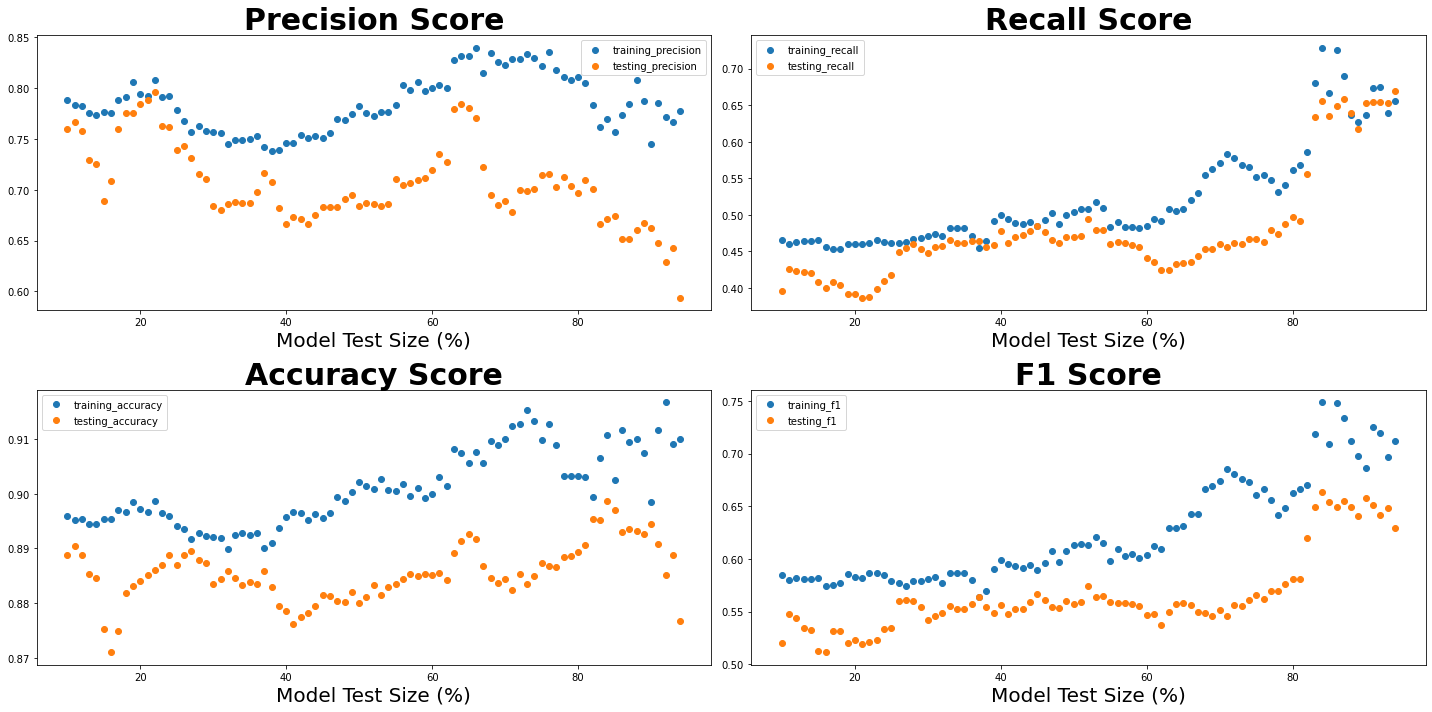

In [97]:
print_metric_comparisons(X, y)

In [105]:
def plot_auc(model, X_train, X_test, y_train, y_test):
    
    # Calculate probability score of each point in training set
    y_train_score = model.decision_function(X_train)
    # Calculate false positive rate, true positive rate, and thresholds for training set
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    # Calculate probability score of each point in test set
    y_test_score = model.decision_function(X_test)
    # Calculate false positive rate, true positive rate, and thresholds for test set
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    
    # Print Area-Under-Curve scores
    print('Training AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    
    plt.figure(figsize = (20, 8))
    lw = 2
    
    # Use Train False/True Positive ratios to plot receiver operating characteristic curve for training set
    plt.subplot(121)
    plt.plot(train_fpr, train_tpr, color = 'red', lw = lw, label = 'ROC Curve')
    # Plot positive line w/ slope = 1 for ROC-curve reference
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate', fontsize = 20, fontweight = 'bold')
    plt.ylabel('True Positive Rate', fontsize = 20, fontweight = 'bold')
    plt.title('Receiver operating characteristic (ROC) Curve for Training Set', fontweight = 'bold', fontsize = 20)
    plt.legend(loc='lower right')

    # Use Test False/True positive ratios to plot receiver operating characteristic curve for test set
    plt.subplot(122)
    plt.plot(test_fpr, test_tpr, color='red',
         lw=lw, label='ROC curve')
    # Plot positive line w/ slope = 1 for ROC-curve reference
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate', fontweight = 'bold', fontsize = 20)
    plt.ylabel('True Positive Rate', fontweight = 'bold', fontsize = 20)
    plt.title('Receiver operating characteristic (ROC) Curve for Test Set', fontweight = 'bold', fontsize = 20)
    plt.legend(loc='lower right')
    
#     plt.savefig('pics/Regression_pics/roc_curve.png')
    
    plt.tight_layout()


Training AUC: 0.9360416607696218
Test AUC: 0.930241717126963


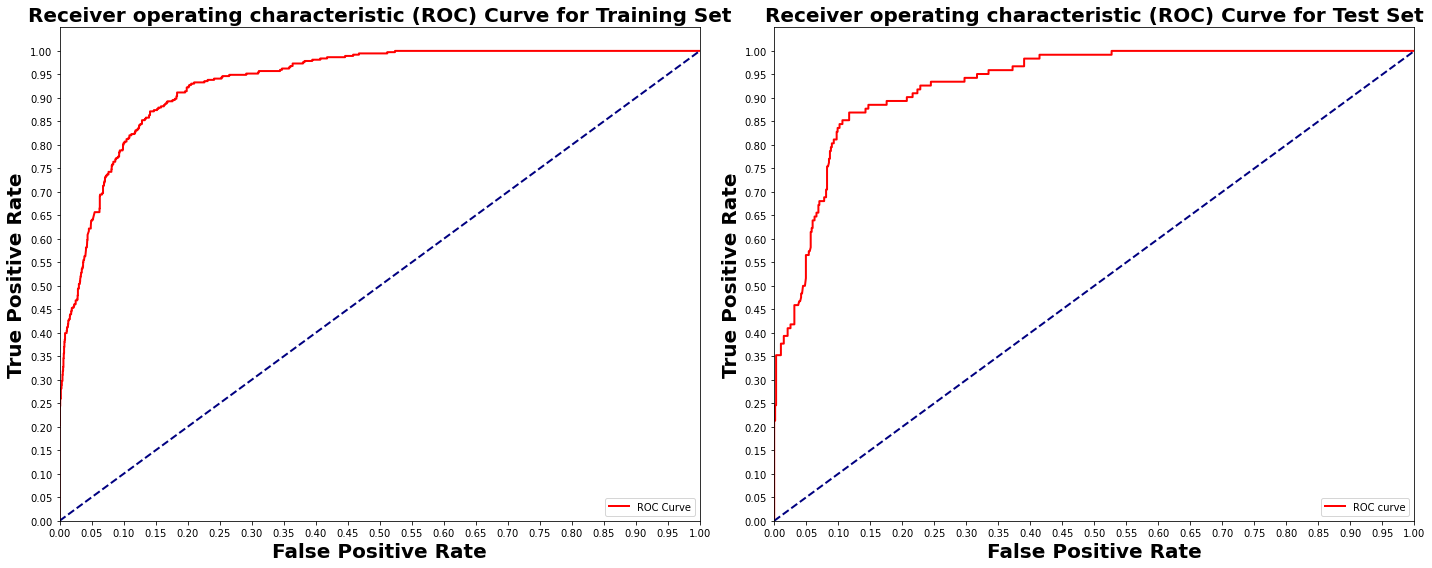

In [106]:
plot_auc(logreg, X_train, X_test, y_train, y_test)